First we will import the dataset required.

In [ ]:
!gdown 1pDyP7aH1c3gy23Z1xT816_WNOhQ-u1PH

Downloading...
From: https://drive.google.com/uc?id=1pDyP7aH1c3gy23Z1xT816_WNOhQ-u1PH
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 78.1MB/s]


Now we will import all the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

## Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.

Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.  

Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.

The company wants to know:  
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?  
- How well those variables describe the electric cycle demands.  

We will use varous testing methods such as `t testing`, `chisquare test`, `anova`, etc. to determine how each attribute in the dataset affects the other and then suggest what steps the company can take to improve its earnings.  
  
We first import the required dataset.

In [ ]:
df = pd.read_csv('/content/bike_sharing.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

**Insight-** The dataset has 10886 rows and 12 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Insight-** The dataset contains a few float values and one object values. Rest are int.

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**insight-** The above table shows us various attributes of each numerical column present in the dataset.

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

**Insight-** This tells us the number of unique values present in each column.

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Insight-** This shows us that there are no null values present in the dataset.

In [ ]:
duplicate_rows = df[df.duplicated()]

In [ ]:
duplicate_rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


**Insight-** This shows us that there are no duplicate values present in the dataset.

In [ ]:
df_num = df.select_dtypes(exclude = 'object') #numerical
df_cat = df.select_dtypes(include = 'object') #categorical

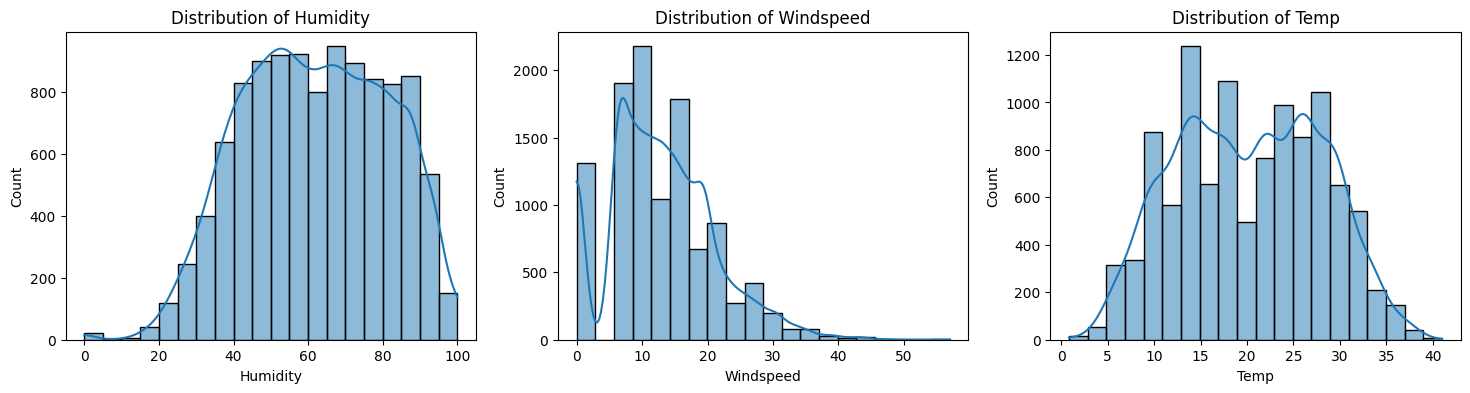

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[18, 4])
cols = ['humidity', 'windspeed', 'temp']
for i, col in enumerate(cols):
    sns.histplot(x=col, data=df_num, bins = 20, kde = True, ax=axes[i])
    axes[i].set_title('Distribution of ' + col.capitalize())
    axes[i].set_xlabel(col.capitalize())
plt.show()

**Insight-** Here we have taken a few numerical columns and have drawn their histograms. This tells us how the data is distributed(whether it is gaussian or not) and which part of the dataset is dominant.

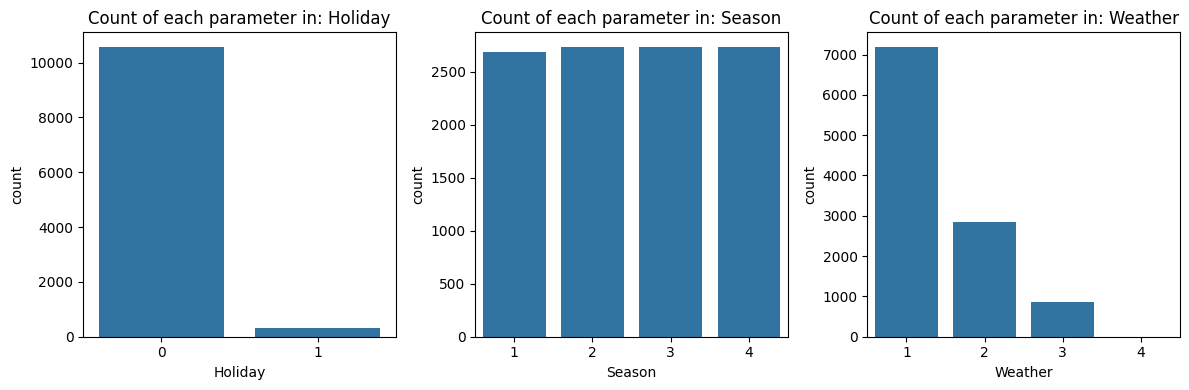

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = [12,4])
columns = ['holiday', 'season', 'weather']
for i, col in enumerate(columns):
  sns.countplot(x = col, data = df_num, ax = axes[i])
  axes[i].set_title(f'Count of each parameter in: {col.capitalize()}')
  axes[i].set_xlabel(col.capitalize())

plt.tight_layout()
plt.show()

**Insight-** Now we draw the count plot for certain categorical columns. This will help us understand which category is dominant and which is not among the respective categories.

In [ ]:
def outliers(df_o):
  Q1 = df_o.quantile(0.25)
  Q3 = df_o.quantile(0.75)
  IQR = Q3 - Q1
  outliers = df_o[(df_o < (Q1 - 1.5*IQR)) | (df_o > (Q3 + 1.5*IQR))]
  return outliers

out = df_num.apply(outliers)
print(f'The max value of outlier is: {out.max()}')
print(f'The min value of outlier is: {out.min()}')

The max value of outlier is: season             NaN
holiday         1.0000
workingday         NaN
weather         4.0000
temp               NaN
atemp              NaN
humidity        0.0000
windspeed      56.9969
casual        367.0000
registered    886.0000
count         977.0000
dtype: float64
The min value of outlier is: season             NaN
holiday         1.0000
workingday         NaN
weather         4.0000
temp               NaN
atemp              NaN
humidity        0.0000
windspeed      32.9975
casual        117.0000
registered    502.0000
count         648.0000
dtype: float64


**Insight-** We use the interquartile range method formula to find out outliers in each numerical categories. In order to visually represent this, we use box plot distribution with workingday as a sub category to show us a clear differentiaition amonth the outliers.

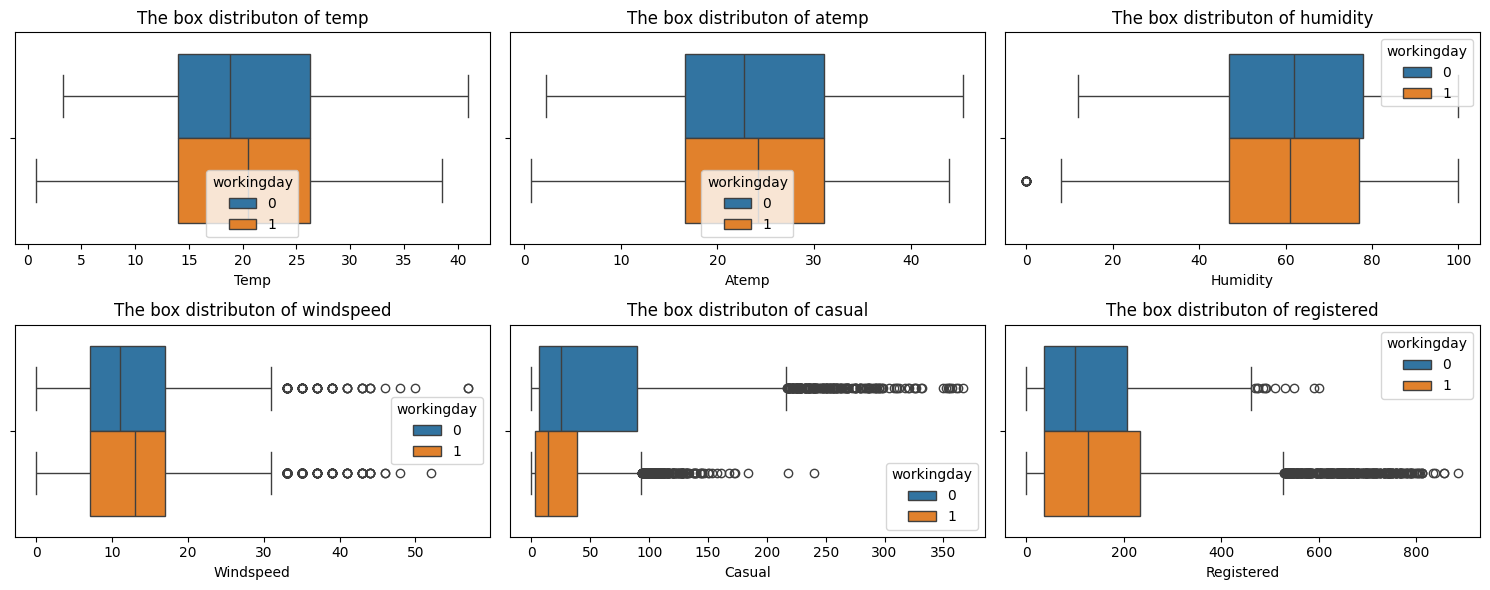

In [ ]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = [15,6])
for i, col in enumerate(cols):
  sns.boxplot(x = col, hue = 'workingday', data = df_num, ax = axes[i//3, i%3])
  axes[i//3, i%3].set_title(f'The box distributon of {col}')
  axes[i//3, i%3].set_xlabel(col.capitalize())
plt.tight_layout()
plt.show()

**Insight-** the graph tells us differentthings about different columns. For example, for the count of casual users, it shows huge number of outliers above the Q3 value. However in the case of Atemp or humidity it shows us a completely balanced picture. These conclusions should be further studied as to why the case is.

## Try establishing a Relationship between the Dependent and Independent Variables.

The relationship between two different variables is represented by **Bivariate graphs**. For most of these graphs, we use the count column which is count of total rental bikes including both casual and registered and measure them against various other columns such as _Weather_, _WorkingDay_ and _Season_.

[]

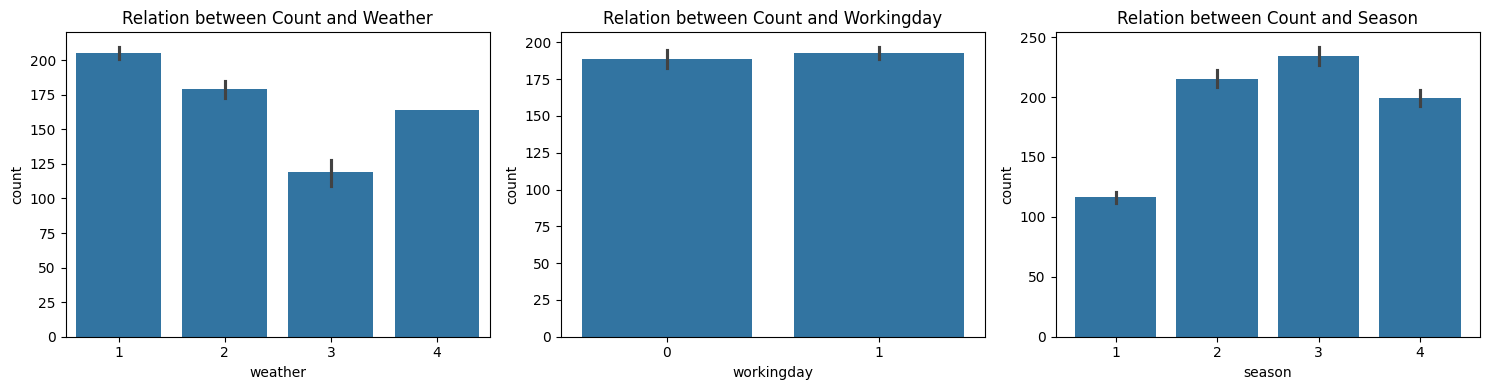

In [ ]:
columns = ['weather', 'workingday', 'season']
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = [15,4])
for i, col in enumerate(columns):
  sns.barplot(x = col, y = 'count' , data = df, ax = axes[i])
  axes[i].set_title(f'Relation between Count and {col.capitalize()}')

plt.tight_layout()
plt.plot()

In order to do multivariate analysis, we use the corr() function to calculate the correlation between variou numerical columns and then draw a heatmap which will help us understand how these values are correlated to each other.

- **_If the correlation values is -ve this means that the two respective variables are negatively correlated. Hence the increase of one causes decrease in the other._**
- **_If the correlation values is +ve this means that the two respective variables are positively correlated. Hence the increase of one causes increase in the other also._**
- **_The square with light colours show positive correlation while the darker ones show negative correlation._**

In [ ]:
map = df_num.corr()
map

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


[]

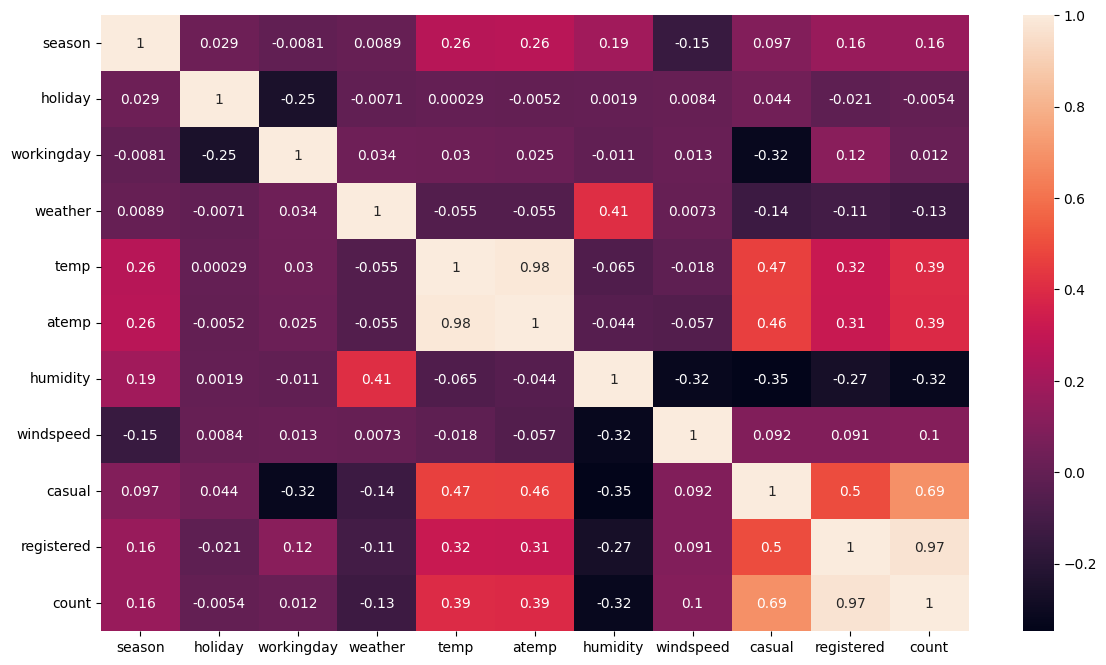

In [ ]:
plt.figure(figsize = [14,8])
sns.heatmap(map, annot = True)
plt.plot()

## Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

H0 : We have sufficient evidence to say that there is no significant difference in number of bike rides on weekdays and weekends.  
Ha : We have sufficient evidence to say that there is significant difference in number of bike rides on weekdays and weekends.  
alpha = 0.05.

Since this is the case of **Numerical v/s Categorical** analysis and there are only 2 values in each column so , we will use `t test`. In t test we will use independent sample t test because number of bikes on weekdays and weekends are independent of each other.

In [ ]:
df_weekdays = df[df.workingday == 1]['count']
df_weekends = df[df.workingday == 0]['count']

In [ ]:
t_stat, p_val = ttest_ind(df_weekdays.values, df_weekends.values, alternative = 'two-sided')
print(t_stat, ' , ', p_val)

1.2096277376026694  ,  0.22644804226361348


In [ ]:
alpha = 0.05
if p_val < alpha:
  print('Reject Null Hypothesis')
else:
  print('Failed to reject null Hypothesis')

Failed to reject null Hypothesis


**Insight-** We fail to reject null hypothesis. This means that we don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

## Check if the demand of bicycles on rent is the same for different Weather conditions?

Since there are 4 types of weather conditions. We have to check whether there is significant difference in demand of bicycles for different weather conditions. So we will have to use one way Anova testing.  because this is the case of Categorical v/s Numerical. So we can formulate the following hypothesis:  
H0: There is significant evidence to suggest that all weather conditions have same number of cycles rented.  
Ha: There is no significant evidence to suggest that all weather conditions have same number of cycles rented. There will be atleast one weather condition which will be different from others.  

However before using anova testing, we will have to check for prerequisites for Anova testing. Those prerequisites are:
- Normality Check: Q-QPlot, Histogram(skewness of the graph)
- Equal Variance Check - Levene Test

### Normality Check

First we will use Q-Q plot

[]

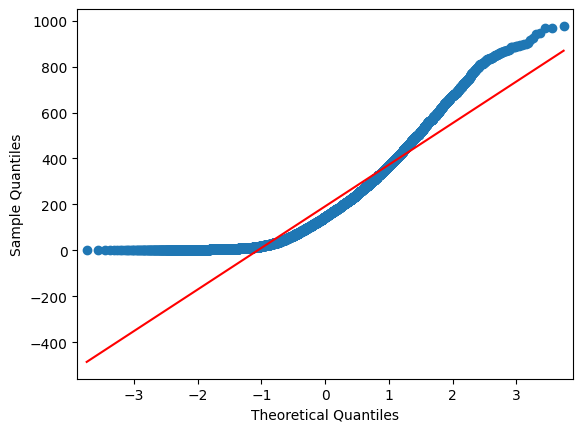

In [ ]:
sm.qqplot(df['count'], line = 's')
plt.plot()

**Insight-** Here the data is not aligning with the q-q plot hence we can assume that the data is not normally distributed.

Now we will draw histogram plot so that we can check the skewness of the graph

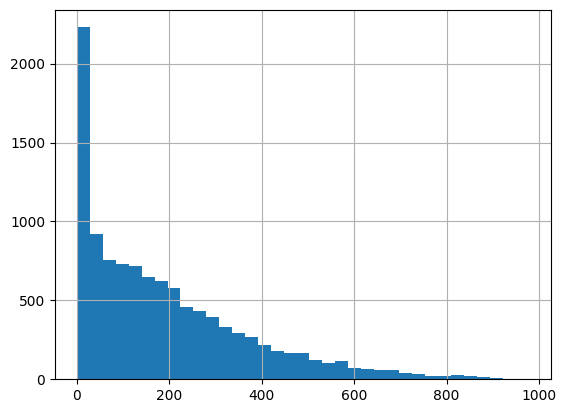

In [ ]:
df['count'].hist(bins = 35)
plt.show()

**Insight-** Since the graph is heavily skewed towards right this means that the data is not normally distributed.

Now we will use Shapiro wilk test for final check.

In [ ]:
count_subset = df['count'].sample(150)
s_stat, p_val = shapiro(count_subset)
print(p_val)
if p_val < 0.05:
  print('The data is not normal')
else:
  print('The data is normal')

2.589618075532485e-09
The data is not normal


**Insight-** This finally confirms that the dataset is not normal.

### Equal Variance

H0: Variance is relatively equal across groups.  
Ha: Variance differs significantly.  

alpha = 0.05

In [ ]:
p_stat, p_val = levene(df[df['weather'] == 1]['count'], df[df['weather'] == 2]['count'], df[df['weather'] == 3]['count'], df[df['weather'] == 4]['count'] )
print(p_stat, ', ', p_val)

54.85106195954556 ,  3.504937946833238e-35


Since p_val is very small compared to alpha, we can reject the null hypothesis and  accept the fact that the variance differes strongly. Since, the dataset has failed both the tests for normality i.e., equal variance across groups and gaussian distribution, so we cannot apply one way anova testing here.  
Hence we will apply kruskal test which is very useful when the data is not normally distributed.

H0: Demand for bicycles on rent is same for all the weather conditions.  
Ha: Demand for bicycles on rent is different for atleast one of the weather conditions.  
alpha = 0.05

In [ ]:
k_stat, p_val = kruskal(df[df['weather'] == 1]['count'], df[df['weather'] == 2]['count'], df[df['weather'] == 3]['count'], df[df['weather'] == 4]['count'])
print(k_stat, ', ', p_val)
alpha = 0.05
if p_val < 0.05:
  print('reject null hypothesis')
else:
  print('failed to reject null hypothesis')

205.00216514479087 ,  3.501611300708679e-44
reject null hypothesis


**Insight-** Since p_value is less than significant value, we we can reject the null hypothesis that the demand for bicycles on rent is same for all weather conditions. This means that weather does impact the bike rides.

## Check if the demand of bicycles on rent is the same for different Seasons?

### Normality Check:
- Q-Q Plot
- Histogram
- Skewness & Kurtosis
- Shapiro Wilk Test

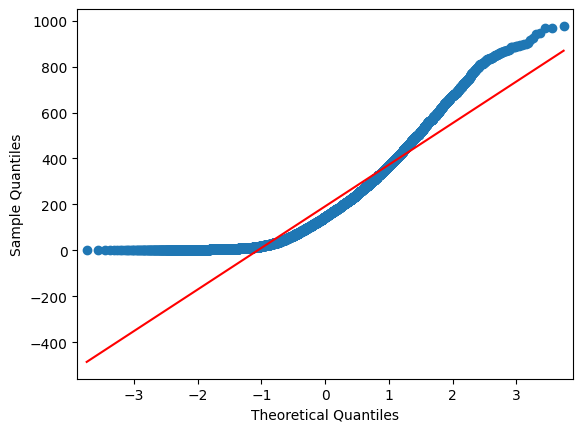

In [ ]:
sm.qqplot(df['count'], line = 's')
plt.show()

**Insight-** We draw the Q-Q plot of count(count of total rental bikes including both casual and registered) to see if there is a normal/gaussian distribution or not. Sunce the data dots do not perfectly align with the gaussian line, we can assume that the data is not normal.

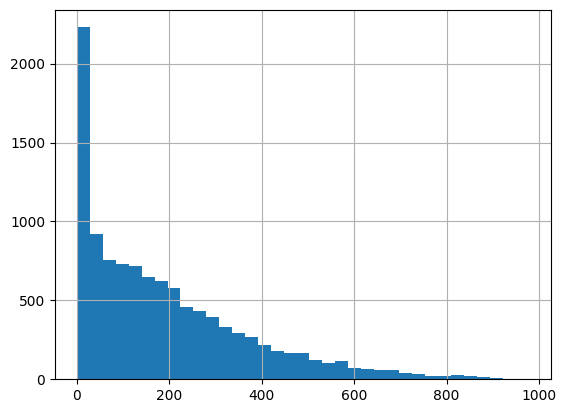

In [ ]:
df['count'].hist(bins = 35)
plt.show()

**Insight-** This shows that the graph is heavily skewed towards right this means that the dataset is not normal. Because a normal graph is symmetric in nature.

In [ ]:
df['count'].kurt()

1.3000929518398334

**Insight-**
- A positive kurtosis value, like 1.3, suggests that the distribution has heavier tails and a more peaked shape compared to a normal distribution. This indicates that there are more extreme values in the dataset than would be expected in a normal distribution.
-  In practical terms, a kurtosis value of 1.3 means that the data has more outliers or extreme values than a normal distribution. This could indicate that the dataset has some unusual or unexpected characteristics, such as high variability or non-normality.

In [ ]:
s_stat, p_val = shapiro(df['count'].sample(150))
print(s_stat, p_val)
if p_val < 0.05:
  print('The data is not normal distribution')
else:
  print('The data is normally distributed')

0.8747390508651733 6.233990546000712e-10
The data is not normal distribution


**Insight-** The final test for this is the Shapiro test which helps us in determining whether the data is normal or not. Since the p_value is less than 0.05, the dataset is not normal distribution.

### Equal Variance

For the equal variance test, we will use levene test. We set the significant value = 0.05. If p is less than 0.05, we will reject null hypothesis that the seasons have equal variance else accept that the variance is same.

In [ ]:
l_stat, p_val = levene(df[df['season'] == 1]['count'], df[df['season'] == 2]['count'], df[df['season'] == 3]['count'], df[df['season'] == 4]['count'])
print(l_stat, ' , ', p_val)
if p_val < 0.05:
  print('The seasons don\'t have equal variance')
else:
  print('The seasons have equal variance')

187.7706624026276  ,  1.0147116860043298e-118
The seasons don't have equal variance


From all the above tests, the data fails on normality and equal variance testing so this means that the dataset is not normal. Thus we can conclude that the data is not normally distributed. Hence we will use kruskal test.

H0: The demand of bicycles on rent is the same for different seasons.  
Ha: The demand of bicycles on rent is different for atleast one season.  
alpha = 0.05

In [ ]:
k_stat, p_val = kruskal(df[df['season'] == 1]['count'], df[df['season'] == 2]['count'], df[df['season'] == 3]['count'], df[df['season'] == 4]['count'])
print(k_stat, ', ', p_val)
alpha = 0.05
if p_val < 0.05:
  print('reject null hypothesis')
else:
  print('failed to reject null hypothesis')

699.6668548181988 ,  2.479008372608633e-151
reject null hypothesis


**Insight-** Since, the p_value is significantly less that 0.05, we can reject the null hypothesis. This means that The demand of bicycles on rent is different for atleast one season.

## Check if the Weather conditions are significantly different during different Seasons?

Since weather and seasons are two categorical column, we will use chisquare testing. However in order to implement chisquare testing we first need to create the contingency table. We do that using crosstab.  
H0: There is no dependency between seasons and weather.  
Ha: There is significant dependency between seasons and weather.

In [ ]:
observed = pd.crosstab(df['weather'], df['season'])
observed

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Now that we have created the contingency table, we will now use the chi2_contingency to find out the chi_stat and p_stat.

In [ ]:
chi_stat, p_stat, dof, exp_freq = chi2_contingency(observed)
[chi_stat, p_stat]

[49.15865559689363, 1.5499250736864862e-07]

In [ ]:
if p_stat < 0.05:
  print('Reject null hypothesis')
else:
  print('Failed to reject null hypothesis')

Reject null hypothesis


**Insight-** Since p_val is less than 0.05, we reject the null hypothesis that there is no dependency between weathers and seasons. This means that there is significant dependency between these two variables.

## Conclusions and Inferneces

- From the t independent test we can conclude that there is no difference between in the average number of bike rides on weekends and weekdays.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- Then we check for the demand for bike rides according to each weather. Since this is the case of numerical v/s categorical we should use Anova testing. However when we check for the normality test and equal variance test which are prerequisites for Anova, we find out that the `count` column does not fullfill either of those. Hence we use the Kruskal Test.
 - So, when we do the Kruskal test, we find out that since p has very small value, we have to reject null value. This means that There is atleast 1 weather where number of bike rides is different. It could be more than one but there is atleast one.
- Now we do the same test for seasons as well because this is also the case of numerical v/s categorical. Here also,the seasons fail the Normality and equal variance test so we have to use kruskal test which is distribution free.
 - When we use the Kruskal test we find that p_value is less than alpha so we reject the null hypothesis. This means that there is atleast 1 season where number of bike rides is different. It could be more than one but there is atleast one.
- Lastly, we have to check whether weather conditions are significantly different during seasons. Since this is the case of categorical v/s categorical we use Chisquare testing. For this we first create a contingency table between weather and season. We do this using pd.crosstab. Then we pass them through the chi2_contingency function and calculate the chi statistic and p_value.
 - We find out that p value is extremely small compared to alpha so we reject the null hypothesis and conclude that there is significant dependency between these two variables.

## Recommendations
- We should see for which season and weather there is less number of bike rides and try to increase the count.
- We should check what kind of dependency is there between seasons and weather and how one affects the other.
- The company should also try to find out ways how to increase the count of bike rides on non holidays.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/Business_Case_Yulu_Hypothesis_Testing.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
[NbConvertApp] Converting notebook /content/Business_Case_Yulu_Hypothesis_Testing.ipynb to pdf
[NbConvertApp] Support files will be in Business_Case_Yulu_Hypothesis_Testing_files/
[NbConvertApp] Making directory ./Business_Case_Yulu_Hypothesis_Testing_files
[NbConvertApp] Making directory ./Business_Case_Yulu_Hypothesis_Testing_files
[NbConvertApp] Making directory ./Business_Case_Yulu_Hypothesis_Testing_files
[NbConvertApp] Making directory ./Business_Case_Yulu_Hypothesis_Testing_files
[NbConvertApp] Making directory ./Business_Case_Yulu_Hypothesis_Testing_files
[NbConvertApp] Making directory ./Business_Case_Yulu_Hypothe